In [166]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer

plt.style.use('ggplot')

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For Bagging implementation
from sklearn.ensemble import BaggingClassifier

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

## Data Exploration

In [167]:
df = pd.read_csv('2019_hdb_dataset_with_mrt_schools_sm.csv')
df = df.drop(columns = ['Unnamed: 0','Year','full_address','address','Postal','nearest_mrt','nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level','nearest_sm'])
df['remaining_lease'] = 99 - (2019 - df['lease_commence_date'])

In [168]:
df = df.drop(columns = ['lease_commence_date'])

In [169]:
df.dtypes

town                             object
flat_type                        object
storey_range                     object
floor_area_sqm                  float64
flat_model                       object
remaining_lease                   int64
resale_price                    float64
Latitude                        float64
Longtitude                      float64
nearest_mrt_distance(km)        float64
nearest_primary_school(km)      float64
nearest_secondary_school(km)    float64
nearest_JC/MI(km)               float64
nearest_mixed_level(km)         float64
nearest_sm_distance(km)         float64
dtype: object

In [170]:
# #No missing data
# df.isna().sum()

In [171]:
df.sample(3)

town flat_type storey_range  floor_area_sqm  \
10912  CHOA CHU KANG    4 ROOM     04 TO 06           103.0   
14637    BUKIT BATOK    4 ROOM     10 TO 12            89.0   
1895   BUKIT PANJANG    5 ROOM     13 TO 15           111.0   

              flat_model  remaining_lease  resale_price  Latitude  Longtitude  \
10912  Premium Apartment               79      340000.0  1.401243  103.749394   
14637         Simplified               67      380000.0  1.348810  103.759893   
1895            Improved               81      430000.0  1.386021  103.762854   

       nearest_mrt_distance(km)  nearest_primary_school(km)  \
10912                  0.464577                    0.319267   
14637                  1.146833                    0.564251   
1895                   0.200483                    0.392074   

       nearest_secondary_school(km)  nearest_JC/MI(km)  \
10912                      0.413487           1.907313   
14637                      0.716185           2.043305   
1895                       0.351828           1.005043   

       nearest_mixed_level(km)  nearest_sm_distance(km)  
10912                 5.253802                 0.538052  
14637                 4.783792                 0.339810  
1895                  5.357055                 0.310664

### which columns can be removed or combined?

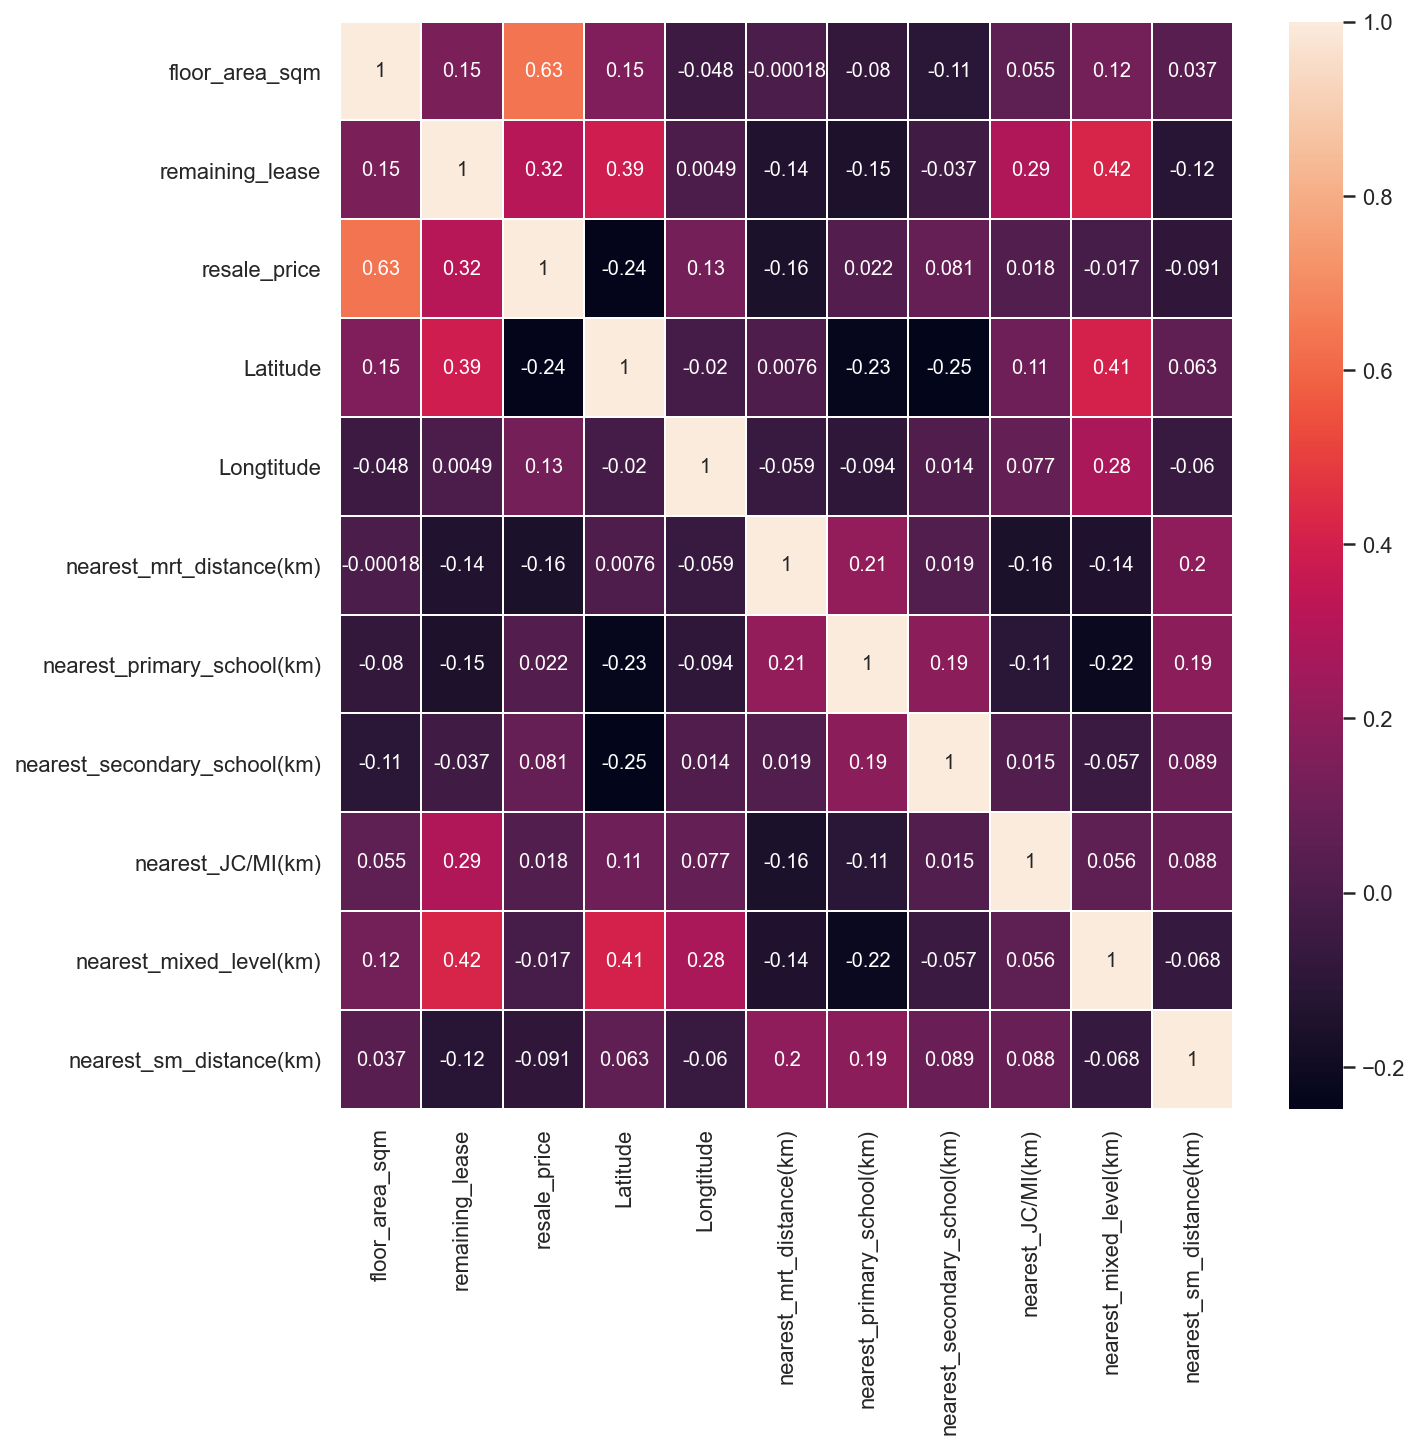

In [172]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [173]:
df.hist(figsize = (10, 10))
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

1. If skewness is less than -1 or greater than 1, the distribution is skewed, but may or may not be considered high depending on the values.

2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetrical.

In [174]:
df.skew()

floor_area_sqm                  0.240309
remaining_lease                 0.112127
resale_price                    1.103113
Latitude                        0.063699
Longtitude                     -0.176659
nearest_mrt_distance(km)        1.076256
nearest_primary_school(km)      1.836181
nearest_secondary_school(km)    1.671053
nearest_JC/MI(km)               0.246006
nearest_mixed_level(km)         0.144590
nearest_sm_distance(km)         2.189764
dtype: float64

In [175]:
df.kurt()

floor_area_sqm                  -0.208395
remaining_lease                 -1.084646
resale_price                     1.281708
Latitude                        -0.661631
Longtitude                      -0.940631
nearest_mrt_distance(km)         1.460200
nearest_primary_school(km)       8.023187
nearest_secondary_school(km)     5.740080
nearest_JC/MI(km)               -0.831651
nearest_mixed_level(km)         -1.119823
nearest_sm_distance(km)         16.428146
dtype: float64

In [176]:
# writer = pd.ExcelWriter('output.xlsx')
# # write dataframe to excel
# df.to_excel(writer)
# # save the excel
# writer.save()
# print('DataFrame is written successfully to Excel File.')

In [177]:
df2 = df.copy()
df2['log_floor_area_sqm'] = np.log(df2['floor_area_sqm'])
df2['log_remaining_lease'] = np.log(df2['remaining_lease'])
df2['log_resale_price'] = np.log(df2['resale_price'])
df2['log_Latitude'] = np.log(df2['Latitude'])
df2['log_Longtitude'] = np.log(df2['Longtitude'])
df2['log_nearest_mrt_distance(km)'] = np.log(df2['nearest_mrt_distance(km)'])
df2['log_nearest_primary_school(km)'] = np.log(df2['nearest_primary_school(km)'])
df2['log_nearest_secondary_school(km)'] = np.log(df2['nearest_secondary_school(km)'])
df2['log_nearest_JC/MI(km)'] = np.sqrt(df2['nearest_JC/MI(km)'])
df2['log_nearest_mixed_level(km)'] = np.sqrt(df2['nearest_mixed_level(km)'])
df2['log_nearest_sm_distance(km)'] = np.sqrt(df2['nearest_sm_distance(km)'])

#Let's check skew values with transformation
print("\nskewness after transformation:\n")
print(df2.skew())


skewness after transformation:

floor_area_sqm                      0.240309
remaining_lease                     0.112127
resale_price                        1.103113
Latitude                            0.063699
Longtitude                         -0.176659
nearest_mrt_distance(km)            1.076256
nearest_primary_school(km)          1.836181
nearest_secondary_school(km)        1.671053
nearest_JC/MI(km)                   0.246006
nearest_mixed_level(km)             0.144590
nearest_sm_distance(km)             2.189764
log_floor_area_sqm                 -0.412676
log_remaining_lease                -0.153802
log_resale_price                    0.233681
log_Latitude                       -0.001279
log_Longtitude                     -0.177713
log_nearest_mrt_distance(km)       -0.526264
log_nearest_primary_school(km)     -0.206428
log_nearest_secondary_school(km)   -0.234020
log_nearest_JC/MI(km)              -0.274886
log_nearest_mixed_level(km)        -0.294084
log_nearest_sm_distanc

In [178]:
#df2 = df2.drop(columns = ['resale_price'])

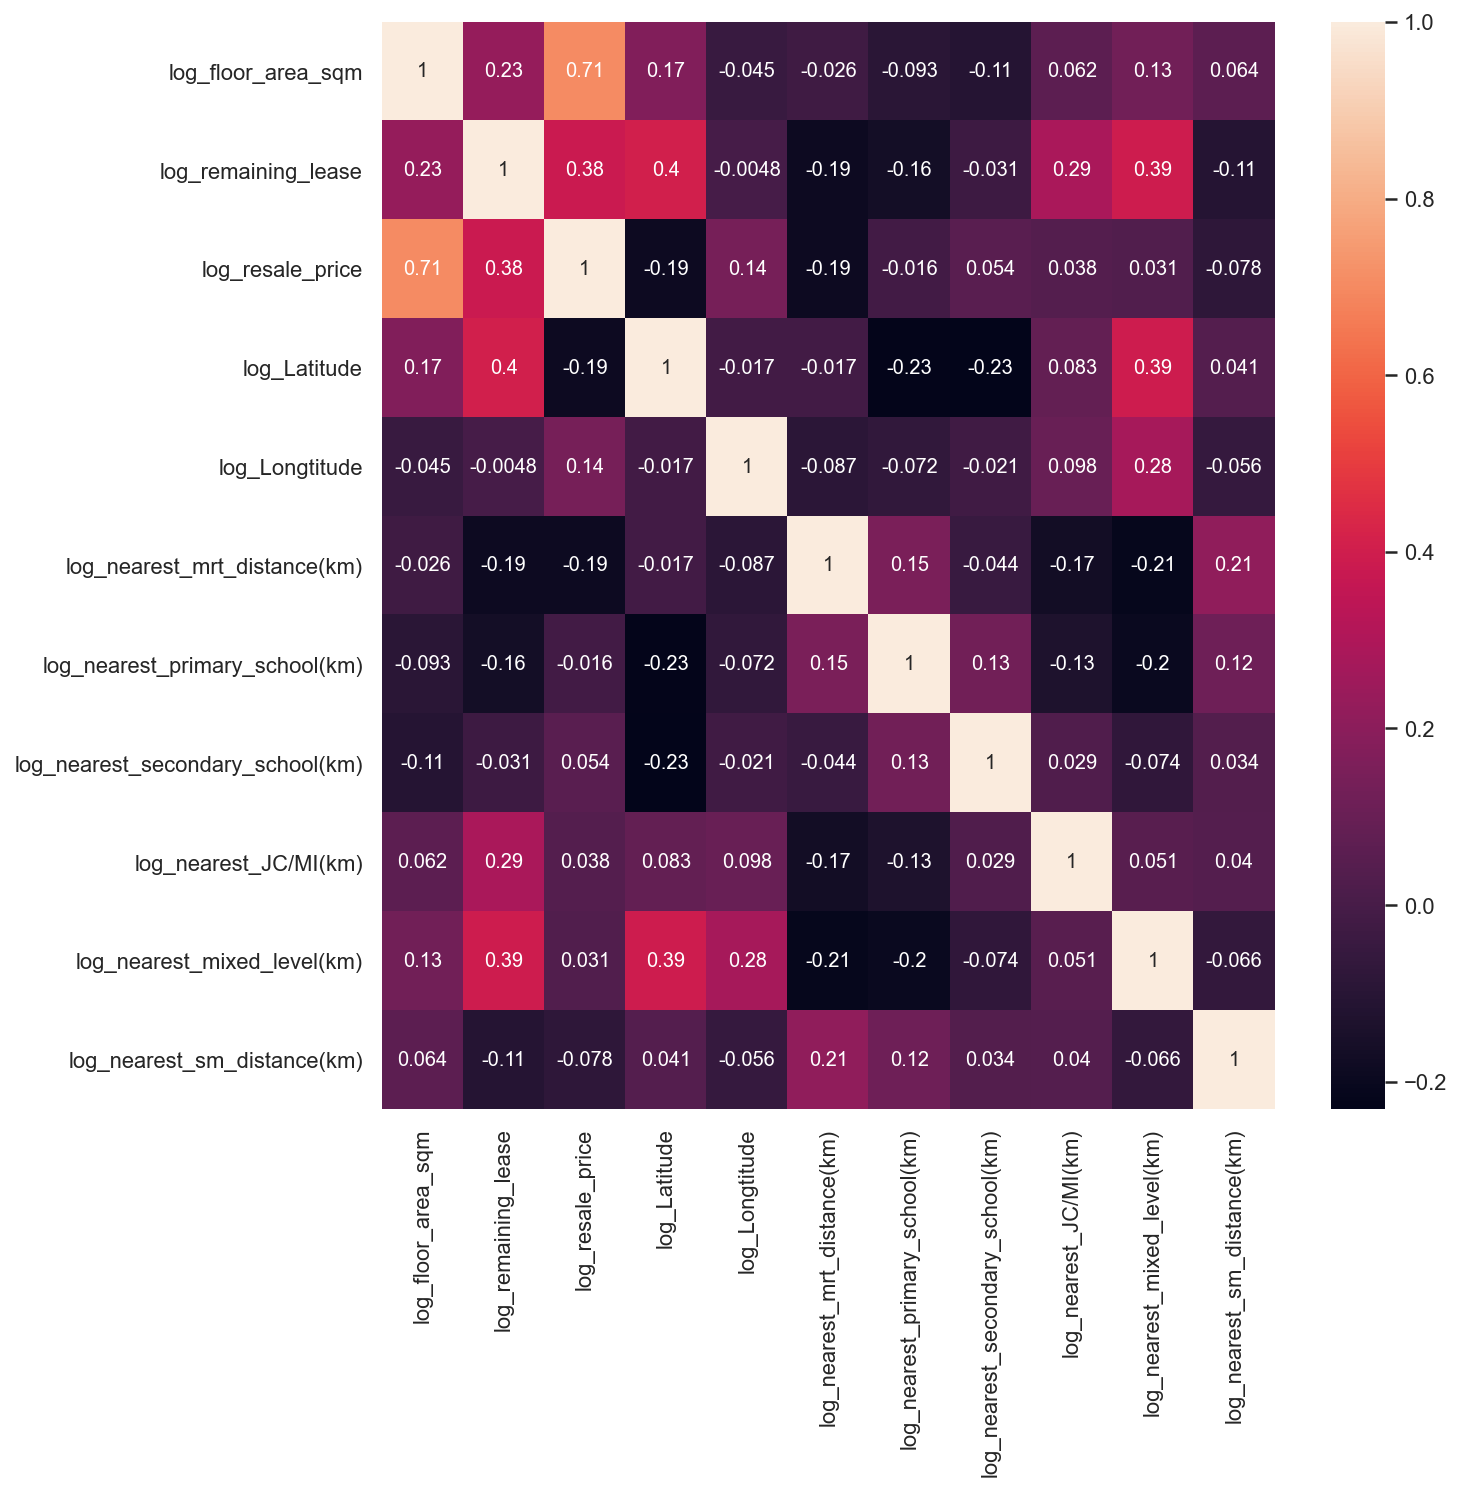

In [179]:
df3 = df2.drop(columns =['floor_area_sqm',
                            'remaining_lease',
                            'resale_price',
                            'Latitude',
                            'Longtitude',
                            'nearest_mrt_distance(km)',
                            'nearest_primary_school(km)',
                            'nearest_secondary_school(km)',
                            'nearest_JC/MI(km)',
                            'nearest_mixed_level(km)',
                            'nearest_sm_distance(km)'])


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
a = df3.corr()
sns.heatmap(a,annot = True)

## Categorical Encoding

### label coder

In [180]:
df3['town'].unique()
df3['town_region'] = df3['town'].map({'ANG MO KIO':'North_East',
                             'BEDOK': 'East',
                             'BISHAN':'Central',
                             'BUKIT BATOK':'West',
                             'BUKIT MERAH':'Central',                 
                             'BUKIT PANJANG':'West',
                             'BUKIT TIMAH':'Central',
                             'CENTRAL AREA':'Central',
                             'CHOA CHU KANG':'West',
                             'CLEMENTI':'West',
                             'GEYLANG':'Central',
                             'HOUGANG':'North_East',
                             'JURONG EAST':'West',
                             'JURONG WEST':'West',
                             'KALLANG/WHAMPOA':'Central',
                             'MARINE PARADE':'Central',
                             'PASIR RIS': 'East',
                             'PUNGGOL':'North_East',
                             'QUEENSTOWN':'Central',
                             'SEMBAWANG': 'North',
                             'SENGKANG':'North_East',
                             'SERANGOON':'North_East',
                             'TAMPINES': 'East',
                             'TOA PAYOH':'Central',
                             'WOODLANDS': 'North',
                             'YISHUN': 'North'})
# df['town_region_encoded'] = df['town_region'].map({'West':1,'North':2, 'North_East':3,'East':4,'Central':5})
df3 = df3.drop(columns = ['town'])

df3['storey_range'].unique()
df3['storey_range_encoded'] = df3['storey_range'].map({
                                        '10 TO 12':1,
                                        '01 TO 03':2,
                                        '04 TO 06':3,
                                        '07 TO 09':4,
                                        '13 TO 15':5,
                                        '19 TO 21':6,
                                        '22 TO 24':7,
                                        '16 TO 18':8,
                                        '34 TO 36':9,
                                        '28 TO 30':10,
                                        '37 TO 39':11,
                                        '49 TO 51':12,
                                        '25 TO 27':13,
                                        '40 TO 42':14,
                                        '31 TO 33':15,
                                        '46 TO 48':16,
                                        '43 TO 45':17})
df3 = df3.drop(columns = ['storey_range'])

In [181]:
df3.head()

flat_type      flat_model  log_floor_area_sqm  log_remaining_lease  \
0    3 ROOM  New Generation            4.219508             4.110874   
1    3 ROOM  New Generation            4.290459             4.025352   
2    3 ROOM  New Generation            4.204693             4.060443   
3    3 ROOM  New Generation            4.204693             4.060443   
4    3 ROOM  New Generation            4.219508             4.110874   

   log_resale_price  log_Latitude  log_Longtitude  \
0         12.506177      0.309271        4.642957   
1         12.594731      0.312295        4.642867   
2         12.506177      0.312908        4.642833   
3         12.345835      0.312908        4.642833   
4         12.478006      0.308471        4.642964   

   log_nearest_mrt_distance(km)  log_nearest_primary_school(km)  \
0                     -0.167719                       -1.033181   
1                     -0.042794                       -0.912841   
2                      0.262140                       -1.550459   
3                      0.262140                       -1.550459   
4                     -0.020769                       -1.213290   

   log_nearest_secondary_school(km)  log_nearest_JC/MI(km)  \
0                         -0.592763               1.083386   
1                         -1.964996               0.686442   
2                         -1.142012               0.777840   
3                         -1.142012               0.777840   
4                         -0.408700               1.119863   

   log_nearest_mixed_level(km)  log_nearest_sm_distance(km) town_region  \
0                     1.041045                     0.625431  North_East   
1                     1.066052                     0.000000  North_East   
2                     0.905805                     0.397191  North_East   
3                     0.905805                     0.397191  North_East   
4                     1.022217                     0.684595  North_East   

   storey_range_encoded  
0                     2  
1                     3  
2                     4  
3                     2  
4                     2

### One Hot Encoder

In [182]:
#OneHotEncoder categorical nominal data column "town","flat_type","street_name","flat_model","Day of Week"
cols = ["flat_model","town_region"]
for i in cols:
    labelbinarizer = LabelBinarizer()
    x = labelbinarizer.fit_transform(df3[i])
    encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
    df3 = pd.concat([df3, encoded_df], axis=1)

In [183]:
df3

flat_type      flat_model  log_floor_area_sqm  log_remaining_lease  \
0         3 ROOM  New Generation            4.219508             4.110874   
1         3 ROOM  New Generation            4.290459             4.025352   
2         3 ROOM  New Generation            4.204693             4.060443   
3         3 ROOM  New Generation            4.204693             4.060443   
4         3 ROOM  New Generation            4.219508             4.110874   
...          ...             ...                 ...                  ...   
22181  EXECUTIVE       Apartment            4.955827             4.219508   
22182  EXECUTIVE      Maisonette            4.983607             4.219508   
22183  EXECUTIVE       Apartment            5.099866             4.276666   
22184  EXECUTIVE       Apartment            5.099866             4.276666   
22185  EXECUTIVE      Maisonette            4.976734             4.204693   

       log_resale_price  log_Latitude  log_Longtitude  \
0             12.506177      0.309271        4.642957   
1             12.594731      0.312295        4.642867   
2             12.506177      0.312908        4.642833   
3             12.345835      0.312908        4.642833   
4             12.478006      0.308471        4.642964   
...                 ...           ...             ...   
22181         13.270783      0.357360        4.642875   
22182         13.244581      0.357360        4.642875   
22183         13.358226      0.351204        4.642805   
22184         13.578380      0.351863        4.642808   
22185         13.334244      0.346353        4.642807   

       log_nearest_mrt_distance(km)  log_nearest_primary_school(km)  \
0                         -0.167719                       -1.033181   
1                         -0.042794                       -0.912841   
2                          0.262140                       -1.550459   
3                          0.262140                       -1.550459   
4                         -0.020769                       -1.213290   
...                             ...                             ...   
22181                     -0.189331                       -1.066379   
22182                     -0.189331                       -1.066379   
22183                     -0.797363                       -0.473264   
22184                     -0.584382                       -0.534890   
22185                     -0.748127                       -0.786046   

       log_nearest_secondary_school(km)  ...  Simplified  Standard  Terrace  \
0                             -0.592763  ...           0         0        0   
1                             -1.964996  ...           0         0        0   
2                             -1.142012  ...           0         0        0   
3                             -1.142012  ...           0         0        0   
4                             -0.408700  ...           0         0        0   
...                                 ...  ...         ...       ...      ...   
22181                         -0.515289  ...           0         0        0   
22182                         -0.515289  ...           0         0        0   
22183                         -1.126603  ...           0         0        0   
22184                         -0.959883  ...           0         0        0   
22185                         -1.082803  ...           0         0        0   

      Type S1  Type S2  Central  East  North  North_East  West  
0           0        0        0     0      0           1     0  
1           0        0        0     0      0           1     0  
2           0        0        0     0      0           1     0  
3           0        0        0     0      0           1     0  
4           0        0        0     0      0           1     0  
...       ...      ...      ...   ...    ...         ...   ...  
22181       0        0        0     0      1           0     0  
22182       0        0        0     0      1           0     0  
22183     

In [184]:
df3 = df3.drop(columns = ['flat_model','town_region'])

### Normalisation

In [185]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22186 entries, 0 to 22185
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flat_type                         22186 non-null  object 
 1   log_floor_area_sqm                22186 non-null  float64
 2   log_remaining_lease               22186 non-null  float64
 3   log_resale_price                  22186 non-null  float64
 4   log_Latitude                      22186 non-null  float64
 5   log_Longtitude                    22186 non-null  float64
 6   log_nearest_mrt_distance(km)      22186 non-null  float64
 7   log_nearest_primary_school(km)    22186 non-null  float64
 8   log_nearest_secondary_school(km)  22186 non-null  float64
 9   log_nearest_JC/MI(km)             22186 non-null  float64
 10  log_nearest_mixed_level(km)       22186 non-null  float64
 11  log_nearest_sm_distance(km)       22186 non-null  float64
 12  stor

In [191]:
df3.iloc[:,1:]

log_floor_area_sqm  log_remaining_lease  log_resale_price  \
0                4.219508             4.110874         12.506177   
1                4.290459             4.025352         12.594731   
2                4.204693             4.060443         12.506177   
3                4.204693             4.060443         12.345835   
4                4.219508             4.110874         12.478006   
...                   ...                  ...               ...   
22181            4.955827             4.219508         13.270783   
22182            4.983607             4.219508         13.244581   
22183            5.099866             4.276666         13.358226   
22184            5.099866             4.276666         13.578380   
22185            4.976734             4.204693         13.334244   

       log_Latitude  log_Longtitude  log_nearest_mrt_distance(km)  \
0          0.309271        4.642957                     -0.167719   
1          0.312295        4.642867                     -0.042794   
2          0.312908        4.642833                      0.262140   
3          0.312908        4.642833                      0.262140   
4          0.308471        4.642964                     -0.020769   
...             ...             ...                           ...   
22181      0.357360        4.642875                     -0.189331   
22182      0.357360        4.642875                     -0.189331   
22183      0.351204        4.642805                     -0.797363   
22184      0.351863        4.642808                     -0.584382   
22185      0.346353        4.642807                     -0.748127   

       log_nearest_primary_school(km)  log_nearest_secondary_school(km)  \
0                           -1.033181                         -0.592763   
1                           -0.912841                         -1.964996   
2                           -1.550459                         -1.142012   
3                           -1.550459                         -1.142012   
4                           -1.213290                         -0.408700   
...                               ...                               ...   
22181                       -1.066379                         -0.515289   
22182                       -1.066379                         -0.515289   
22183                       -0.473264                         -1.126603   
22184                       -0.534890                         -0.959883   
22185                       -0.786046                         -1.082803   

       log_nearest_JC/MI(km)  log_nearest_mixed_level(km)  ...  Simplified  \
0                   1.083386                     1.041045  ...           0   
1                   0.686442                     1.066052  ...           0   
2                   0.777840                     0.905805  ...           0   
3                   0.777840                     0.905805  ...           0   
4                   1.119863                     1.022217  ...           0   
...                      ...                          ...  ...         ...   
22181               1.235248                     2.430783  ...           0   
22182               1.235248                     2.430783  ...           0   
22183               0.867650                     2.265604  ...           0   
22184               0.855602                     2.271013  ...           0   
22185               1.162075                     2.108056  ...           0   

       Standard  Terrace  Type S1  Type S2  Central  East  North  North_East  \
0             0        0        0        0        0     0      0           1   
1             0        0        0        0        0     0      0           1   
2             0        0        0        0        0     0      0           1   
3             0        0        0        0        0     0      0           1   
4             0        0        0        0        0     0      0           1   
...         ...      ...      ...      ... 

In [192]:
standardScaler = StandardScaler()
standardScaler.fit_transform(df3.iloc[:,1:])

array([[-1.23558945, -1.0182796 , -1.22299201, ..., -0.4851489 ,
         1.7820761 , -0.56829364],
       [-0.96430122, -1.49303163, -0.96026588, ..., -0.4851489 ,
         1.7820761 , -0.56829364],
       [-1.29223582, -1.29823215, -1.22299201, ..., -0.4851489 ,
         1.7820761 , -0.56829364],
       ...,
       [ 2.13051503, -0.09793104,  1.30492221, ...,  2.06122286,
        -0.56114326, -0.56829364],
       [ 2.13051503, -0.09793104,  1.95808959, ...,  2.06122286,
        -0.56114326, -0.56829364],
       [ 1.6597098 , -0.49747146,  1.23377092, ...,  2.06122286,
        -0.56114326, -0.56829364]])

In [193]:
df3

flat_type  log_floor_area_sqm  log_remaining_lease  log_resale_price  \
0         3 ROOM            4.219508             4.110874         12.506177   
1         3 ROOM            4.290459             4.025352         12.594731   
2         3 ROOM            4.204693             4.060443         12.506177   
3         3 ROOM            4.204693             4.060443         12.345835   
4         3 ROOM            4.219508             4.110874         12.478006   
...          ...                 ...                  ...               ...   
22181  EXECUTIVE            4.955827             4.219508         13.270783   
22182  EXECUTIVE            4.983607             4.219508         13.244581   
22183  EXECUTIVE            5.099866             4.276666         13.358226   
22184  EXECUTIVE            5.099866             4.276666         13.578380   
22185  EXECUTIVE            4.976734             4.204693         13.334244   

       log_Latitude  log_Longtitude  log_nearest_mrt_distance(km)  \
0          0.309271        4.642957                     -0.167719   
1          0.312295        4.642867                     -0.042794   
2          0.312908        4.642833                      0.262140   
3          0.312908        4.642833                      0.262140   
4          0.308471        4.642964                     -0.020769   
...             ...             ...                           ...   
22181      0.357360        4.642875                     -0.189331   
22182      0.357360        4.642875                     -0.189331   
22183      0.351204        4.642805                     -0.797363   
22184      0.351863        4.642808                     -0.584382   
22185      0.346353        4.642807                     -0.748127   

       log_nearest_primary_school(km)  log_nearest_secondary_school(km)  \
0                           -1.033181                         -0.592763   
1                           -0.912841                         -1.964996   
2                           -1.550459                         -1.142012   
3                           -1.550459                         -1.142012   
4                           -1.213290                         -0.408700   
...                               ...                               ...   
22181                       -1.066379                         -0.515289   
22182                       -1.066379                         -0.515289   
22183                       -0.473264                         -1.126603   
22184                       -0.534890                         -0.959883   
22185                       -0.786046                         -1.082803   

       log_nearest_JC/MI(km)  ...  Simplified  Standard  Terrace  Type S1  \
0                   1.083386  ...           0         0        0        0   
1                   0.686442  ...           0         0        0        0   
2                   0.777840  ...           0         0        0        0   
3                   0.777840  ...           0         0        0        0   
4                   1.119863  ...           0         0        0        0   
...                      ...  ...         ...       ...      ...      ...   
22181               1.235248  ...           0         0        0        0   
22182               1.235248  ...           0         0        0        0   
22183               0.867650  ...           0         0        0        0   
22184               0.855602  ...           0         0        0        0   
22185               1.162075  ...           0         0        0        0   

       Type S2  Central  East  North  North_East  West  
0            0        0     0      0           1     0  
1            0        0     0      0           1     0  
2            0        0     0      0           1     0  
3            0        0     0      0           1     0  
4            0        0     0      0           1     0  
...        ...      ...   ...    ...         ...   ...  
2218

In [161]:
from sklearn.decomposition import PCA
# initialise PCA with _ principle components
pca = PCA(n_components = 10)
# apply PCA for _____ columns 
pca_components = pca.fit_transform(df3)
# convert numpy array to dataframe
pca_df3 = pd.DataFrame(pca_components)
# combine the principle components into the original dataframe
main_df3 = pd.concat([df3, pca_df3], axis=1)
main_df3
print('Variation by principal component: {}'.format(pca.explained_variance_ratio_))
#well if we assume just components of numerical, then log1p_resale_price, and floor_area_sqm wins

Variation by principal component: [0.50756433 0.07649468 0.06036832 0.05025463 0.0407271  0.03481033
 0.03285611 0.0301067  0.02435816 0.02351537]


In [133]:
#Time to predict

In [194]:
x = df3.drop(columns = ['flat_type']) 
y = df3['flat_type']

In [195]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
random_state = 1, stratify = y)
#y_train.value_counts()

In [196]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

In [198]:
#best K is now 5
knn5 = KNeighborsClassifier(n_neighbors = 1)
knn5.fit(x_train, y_train)
y_pred = knn5.predict(x_test)

In [199]:
# Find the confusion matrix of the result
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Find the accuracy and F1 score of the result
from sklearn.metrics import accuracy_score
y_pred = knn5.predict(x_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import f1_score
print('Accuracy:',accuracy_score(y_test, y_pred))
print('F1_score:',f1_score(y_test, y_pred, average='micro'))
print('Precision',precision_score(y_test, y_pred, average='micro'))

[[   3    0    0    0    0    0    0]
 [   0   77    8    0    0    0    0]
 [   0   42 1392  169    6    0    0]
 [   0    5  221 2512  138    8    0]
 [   0    0    6   86 1474   24    1]
 [   0    0    0    2   10  469    1]
 [   0    0    0    0    0    0    2]]
Accuracy: 0.8907752403846154
F1_score: 0.8907752403846154
Precision 0.8907752403846154


In [201]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

chart = plot_confusion_matrix(knn5, x_test, y_test, ax=ax, xticks_rotation = 45);

In [48]:
# 3 room tend to be confused with 4 room.
# 4 room tend to be confused with 3 room and 5 room.
# 5 room tend to be confused with 4 room and executive. 

In [210]:
#K-fold Cross Validation
#data is divided into k parts, cross_val_score is ran k times, each time
#one of the k subset data will be used as test set, the others are combined
#and used as training data. Accuracy is averaged over k trials
# cv = no. of subset datas the dataset is cut into, in this case its 10. 
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 1)
cv_scores1 = cross_val_score(knn_cv, x, y, cv = 10) #default is accuracy
cv_scores1

array([0.908968  , 0.89139252, 0.90491212, 0.89995493, 0.89950428,
       0.90941866, 0.89990983, 0.90036069, 0.8908927 , 0.89900812])

In [211]:
cv_scores1.mean()

0.9004321843769951

In [430]:
#Using Knn,its pretty accurate in determining flat_type
#based on resale price and floor_area_sqm.

#but what other components of the dataset can we use?
#We cant use pca, as pca is for numerical data and we only have 2 columns
#we can do decision tree, but prof haven't go through the lab.


##### What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. In scikit-learn, we use GridSearchCV, which trains out model multiple times on a range of values specificed with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed best.

In [212]:
#finding the best k, considering I assumed it as 5
# tuning the hyperparameter, gridsearch is used 
from sklearn.model_selection import GridSearchCV
knnGS = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,10)}
knn_gscv = GridSearchCV(knnGS, param_grid, cv=10)
knn_gscv.fit(x,y)
knn_gscv.best_params_

{'n_neighbors': 1}